## Import Libraries..

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

## Read data from csv file..

In [2]:
data = pd.read_csv('NSE-TATAGLOBAL.csv')

In [3]:
stock_data = pd.DataFrame(data)
stock_data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
stock_data.shape

(2035, 8)

In [5]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [6]:
stock_data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


## Data Cleaning..

In [7]:
stock_data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

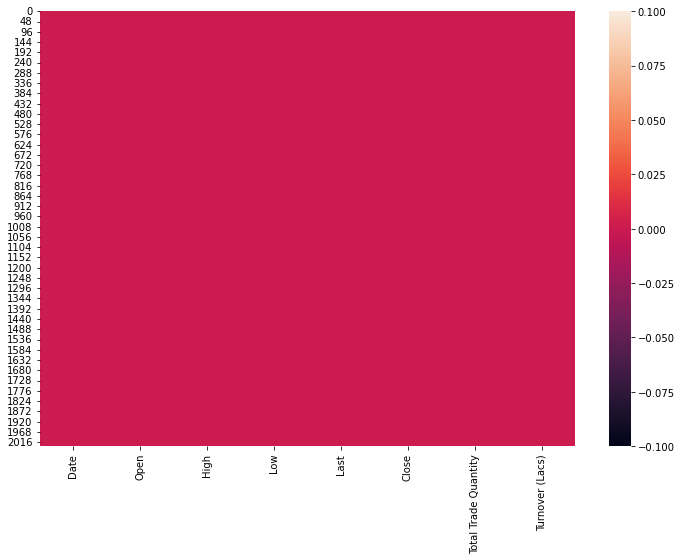

In [8]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(stock_data.isnull())
plt.show()

In [9]:
stock_data.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


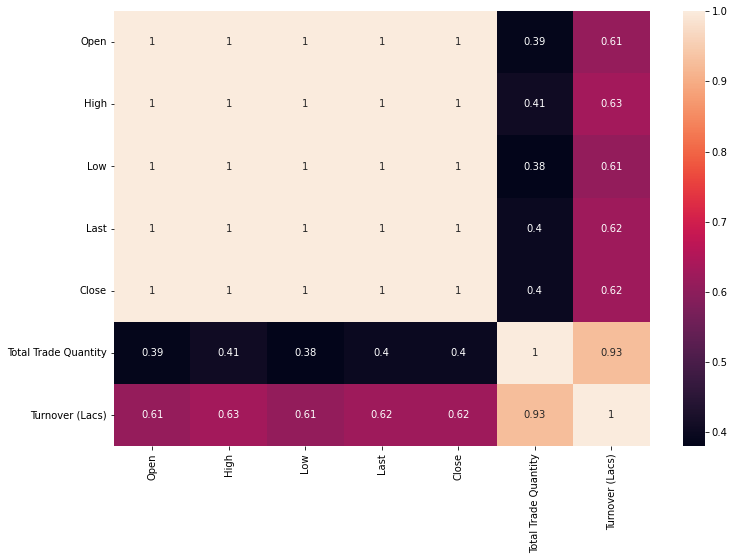

In [10]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(stock_data.corr(), annot = True)
plt.show()

## Plot Close Price..

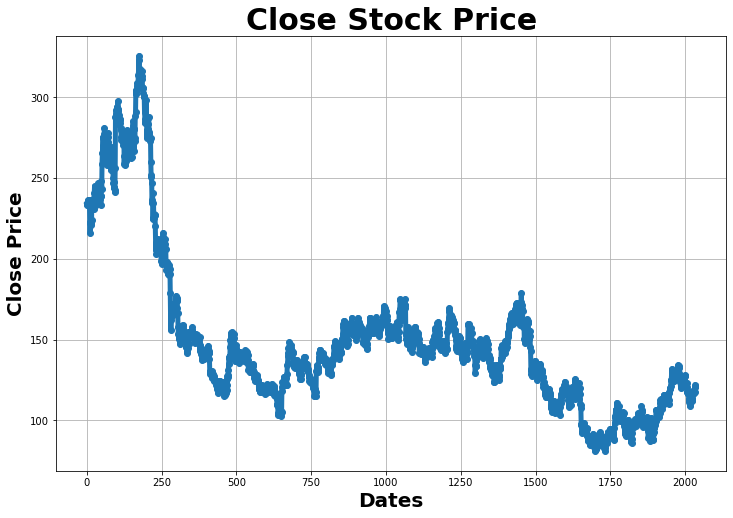

In [11]:
fig = plt.figure(figsize = (12, 8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20, fontweight = 'bold')
plt.ylabel('Close Price', fontsize = 20, fontweight = 'bold')
plt.plot(stock_data['Close'], linewidth = 5, marker = 'o')
plt.title('Close Stock Price', fontsize = 30, fontweight = 'bold')
plt.show()

In [12]:
stock_data.shape

(2035, 8)

In [13]:
train = stock_data.iloc[:, 1:2].values
test = stock_data.iloc[:, 1:2].values

In [14]:
train

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [15]:
test

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [16]:
train.shape

(2035, 1)

In [17]:
test.shape

(2035, 1)

In [18]:
stock_data.shape

(2035, 8)

## MinMax Scaler..

In [19]:
min_max = MinMaxScaler(feature_range = (0, 1))

In [20]:
train_scaled = min_max.fit_transform(train)

In [21]:
x_train = []
y_train = []

for i in range(30, 2035):
    x_train.append(train_scaled[i - 30 : i, 0])
    y_train.append(train_scaled[i, 0])

In [22]:
x_train

[array([0.6202352 , 0.62226277, 0.64436334, 0.61719384, 0.61820762,
        0.62408759, 0.62793998, 0.63584753, 0.61658556, 0.57725061,
        0.54845904, 0.57339822, 0.57339822, 0.56731549, 0.57948094,
        0.57137064, 0.63706407, 0.62814274, 0.63219789, 0.62550689,
        0.61942417, 0.63219789, 0.61111111, 0.62206002, 0.64557989,
        0.67234388, 0.66058394, 0.64760746, 0.6283455 , 0.62408759]),
 array([0.62226277, 0.64436334, 0.61719384, 0.61820762, 0.62408759,
        0.62793998, 0.63584753, 0.61658556, 0.57725061, 0.54845904,
        0.57339822, 0.57339822, 0.56731549, 0.57948094, 0.57137064,
        0.63706407, 0.62814274, 0.63219789, 0.62550689, 0.61942417,
        0.63219789, 0.61111111, 0.62206002, 0.64557989, 0.67234388,
        0.66058394, 0.64760746, 0.6283455 , 0.62408759, 0.61597729]),
 array([0.64436334, 0.61719384, 0.61820762, 0.62408759, 0.62793998,
        0.63584753, 0.61658556, 0.57725061, 0.54845904, 0.57339822,
        0.57339822, 0.56731549, 0.57948094, 

In [23]:
y_train

[0.6159772911597728,
 0.6334144363341444,
 0.6307785888077859,
 0.6332116788321167,
 0.6484184914841848,
 0.6246958637469586,
 0.6281427412814273,
 0.6139497161394971,
 0.6796431467964315,
 0.6581508515815085,
 0.6593673965936739,
 0.6484184914841848,
 0.6277372262773723,
 0.6788321167883211,
 0.6605839416058394,
 0.6399026763990268,
 0.6088807785888077,
 0.6431467964314679,
 0.678426601784266,
 0.6506488240064883,
 0.7169505271695051,
 0.745742092457421,
 0.7676399026763989,
 0.7854825628548256,
 0.789943227899432,
 0.7589213300892133,
 0.7652068126520681,
 0.7962287104622869,
 0.810624493106245,
 0.7437145174371451,
 0.7700729927007299,
 0.7364152473641523,
 0.7376317923763178,
 0.7461476074614761,
 0.7449310624493106,
 0.7258718572587186,
 0.7169505271695051,
 0.7175587996755881,
 0.740470397404704,
 0.7848742903487427,
 0.7723033252230334,
 0.8031224655312246,
 0.7652068126520681,
 0.7538523925385239,
 0.7366180048661801,
 0.748175182481752,
 0.740470397404704,
 0.7534468775344687,

In [24]:
x_train = np.array(x_train)
y_train = np.array(y_train)

In [25]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [26]:
x_train.shape

(2005, 30, 1)

## Deep Learning Model..

In [27]:
dl_model = Sequential()

In [28]:
dl_model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
dl_model.add(Dropout(0.2))

dl_model.add(LSTM(units = 50, return_sequences = True))
dl_model.add(Dropout(0.2))

dl_model.add(LSTM(units = 50, return_sequences = True))
dl_model.add(Dropout(0.2))

dl_model.add(LSTM(units = 50))
dl_model.add(Dropout(0.2))

dl_model.add(Dense(units = 1))

In [29]:
dl_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Train DL Model on Data..

In [30]:
dl_model.fit(x_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
63/63 [==============================] - 6s 31ms/step - loss: 0.0163
Epoch 2/50
63/63 [==============================] - 2s 33ms/step - loss: 0.0032
Epoch 3/50
63/63 [==============================] - 2s 33ms/step - loss: 0.0031
Epoch 4/50
63/63 [==============================] - 2s 34ms/step - loss: 0.0028
Epoch 5/50
63/63 [==============================] - 2s 33ms/step - loss: 0.0025
Epoch 6/50
63/63 [==============================] - 2s 32ms/step - loss: 0.0028
Epoch 7/50
63/63 [==============================] - 2s 34ms/step - loss: 0.0025
Epoch 8/50
63/63 [==============================] - 2s 35ms/step - loss: 0.0021
Epoch 9/50
63/63 [==============================] - 2s 35ms/step - loss: 0.0022
Epoch 10/50
63/63 [==============================] - 2s 34ms/step - loss: 0.0020
Epoch 11/50
63/63 [==============================] - 2s 35ms/step - loss: 0.0020
Epoch 12/50
63/63 [==============================] - 2s 34ms/step - loss: 0.0019
Epoch 13/50
63/63 [==================

In [31]:
data_train = stock_data.iloc[:, 1:2]
data_test = stock_data.iloc[:, 1:2]

In [32]:
final_data = pd.concat((data_train, data_test), axis = 0)

In [33]:
final_data.head()

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55


In [34]:
final_data.shape

(4070, 1)

## We set the value = 30..

In [35]:
data_inputs = final_data[len(final_data) - len(data_test) - 30:].values

In [36]:
data_inputs.shape

(2065, 1)

In [37]:
data_inputs = data_inputs.reshape(-1, 1)

In [38]:
data_inputs = min_max.transform(data_inputs)

In [39]:
x_test = []
for i in range(30, 460):
    x_test.append(data_inputs[i - 30 : i, 0])

In [40]:
x_test = np.array(x_test)

In [41]:
x_test.shape

(430, 30)

In [42]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [43]:
x_test.shape

(430, 30, 1)

## Predict DL Model on Data..

In [44]:
stock_pred = dl_model.predict(x_test)
stock_pred = min_max.inverse_transform(stock_pred)

## Visualize the Stock Price on Actual & Predicted Price..

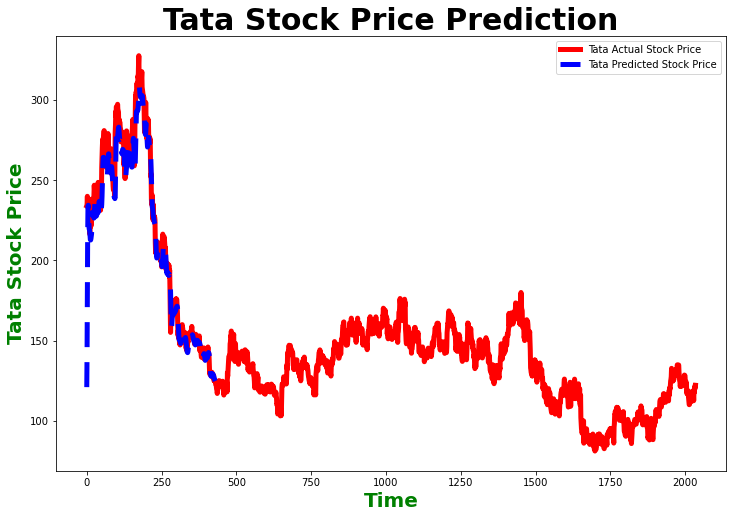

In [45]:
fig = plt.figure(figsize = (12, 8))
plt.plot(data_test, color = 'red', label = 'Tata Actual Stock Price', linewidth = 5)
plt.plot(stock_pred, color = 'blue', label = 'Tata Predicted Stock Price', linewidth = 5, dashes = [5, 3])
plt.title('Tata Stock Price Prediction', fontsize = 30, fontweight = 'bold')
plt.xlabel('Time', fontsize = 20, fontweight = 'bold', color = 'green')
plt.ylabel('Tata Stock Price', fontsize = 20, fontweight = 'bold', color = 'green')
plt.legend()
plt.show()

# THE END..!!